In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
drive.mount('/content/drive')

train_file_path = '/content/drive/MyDrive/Fall 2024/SML 312/Final Project/data/train.csv'
train_df = pd.read_csv(train_file_path)

Mounted at /content/drive


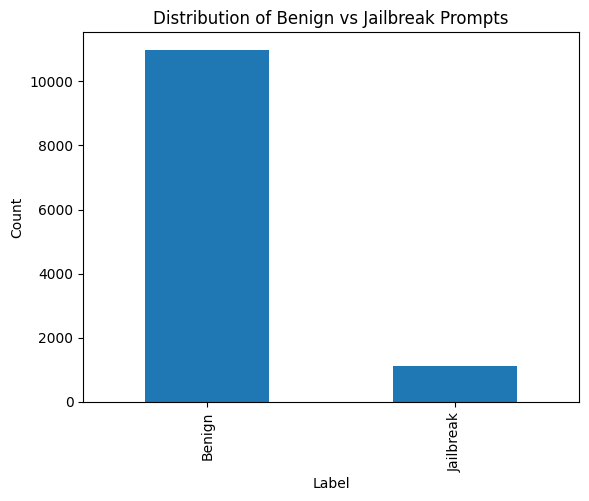

In [ ]:
# Plot distribution of jailbreak labels (target)
# Jailbreak prompts outnumber benign prompts at almost 10:1 ratio

train_df['jailbreak'].value_counts().plot(kind='bar')
plt.title('Distribution of Benign vs Jailbreak Prompts')
plt.xlabel('Label')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Jailbreak'])
plt.ylabel('Count')
plt.show()

In [ ]:
# Visualize count feature with KDE plot and bar plot

def plot_count_feature(df, feature, x_label, title):

  fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [2, 1]})

  # KDE plot for distribution (left)
  sns.kdeplot(
      data=df,
      x=feature,
      hue='jailbreak',
      fill=True,
      alpha=0.3,
      bw_adjust=1.0,
      palette='Set2',
      common_norm=False,
      ax=axes[0]
  )
  axes[0].set_title(title, fontsize=12)
  axes[0].set_xlabel(x_label, fontsize=10)
  axes[0].set_ylabel('Density', fontsize=10)
  axes[0].set_xlim([0, train_df[feature].quantile(0.99)])
  axes[0].grid(axis='y', linestyle='--', alpha=0.5)

  # Bar plot for average (right)
  avg_feature = df.groupby('jailbreak')[feature].mean().reset_index()
  sns.barplot(
      data=avg_feature,
      x='jailbreak',
      y=feature,
      hue='jailbreak',
      dodge=False,
      palette='Set2',
      ax=axes[1]
  )
  axes[1].set_title(f'Average {feature} by Jailbreak', fontsize=12)
  axes[1].set_xlabel('Jailbreak', fontsize=10)
  axes[1].set_ylabel(f'Average {feature}', fontsize=10)
  axes[1].grid(axis='y', linestyle='--', alpha=0.5)

  plt.tight_layout()
  plt.show()

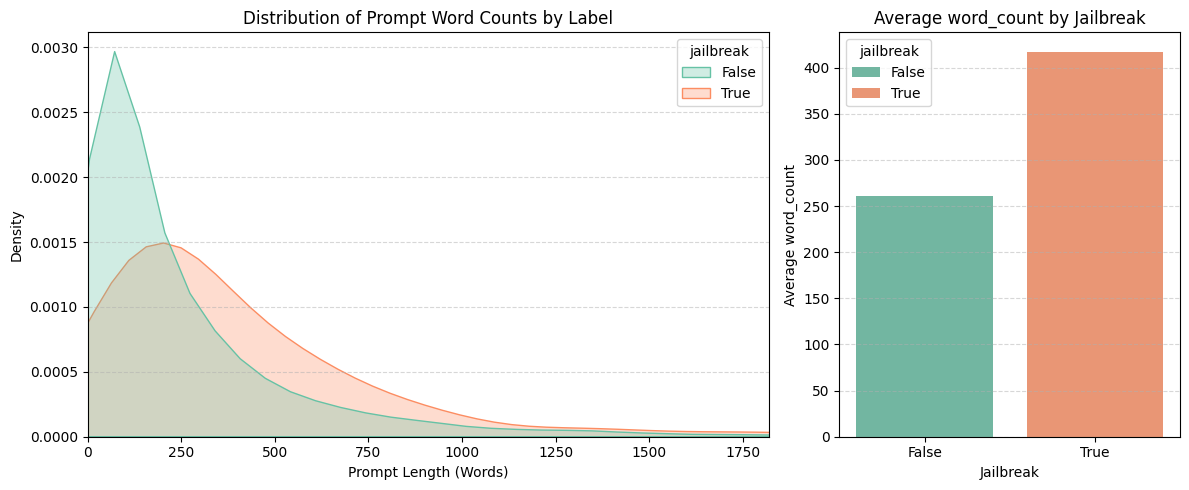

In [ ]:
plot_count_feature(train_df, 'word_count', 'Prompt Length (Words)', 'Distribution of Prompt Word Counts by Label')

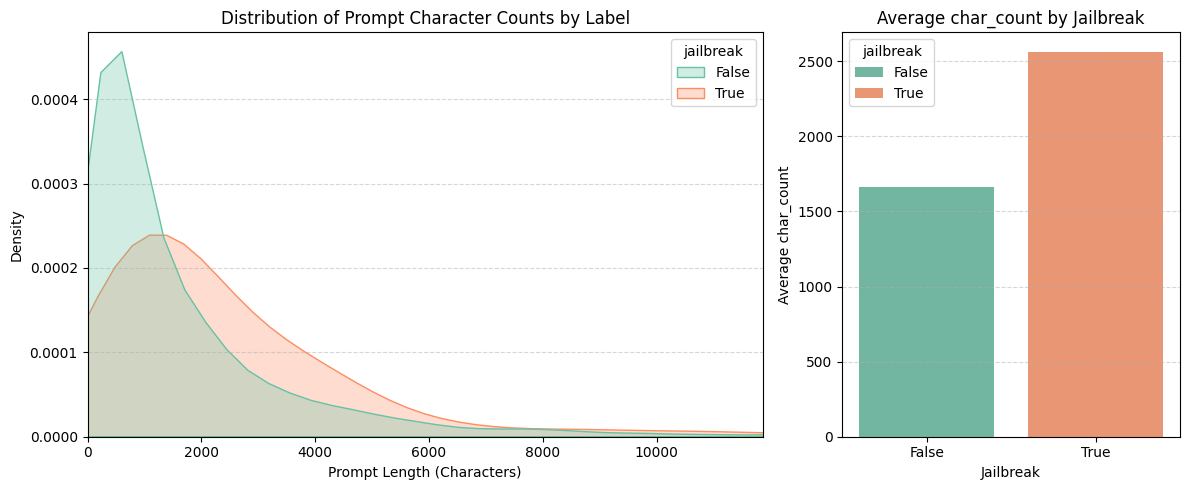

In [ ]:
plot_count_feature(train_df, 'char_count', 'Prompt Length (Characters)', 'Distribution of Prompt Character Counts by Label')

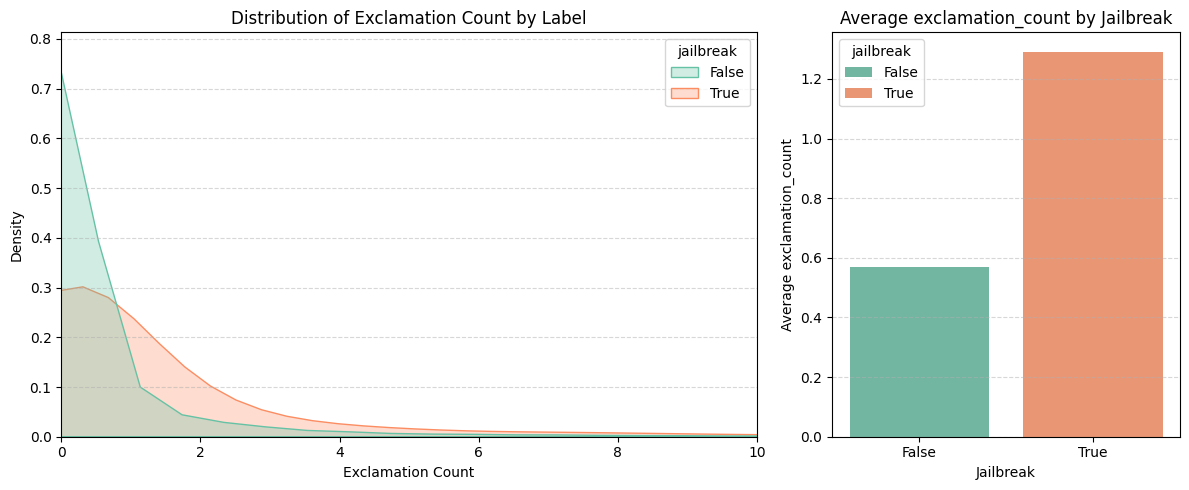

In [ ]:
plot_count_feature(train_df, 'exclamation_count', 'Exclamation Count', 'Distribution of Exclamation Count by Label')

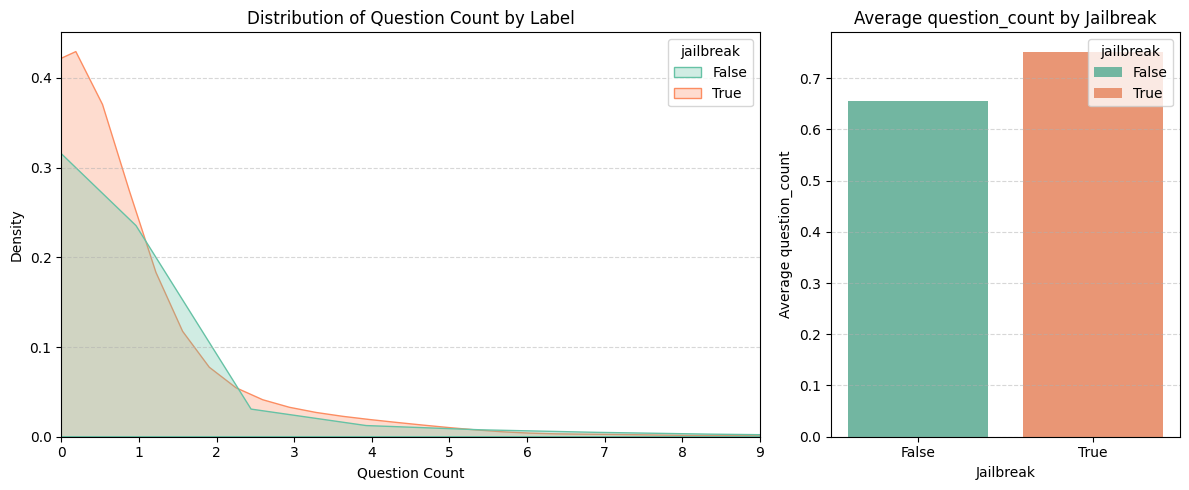

In [ ]:
plot_count_feature(train_df, 'question_count', 'Question Count', 'Distribution of Question Count by Label')

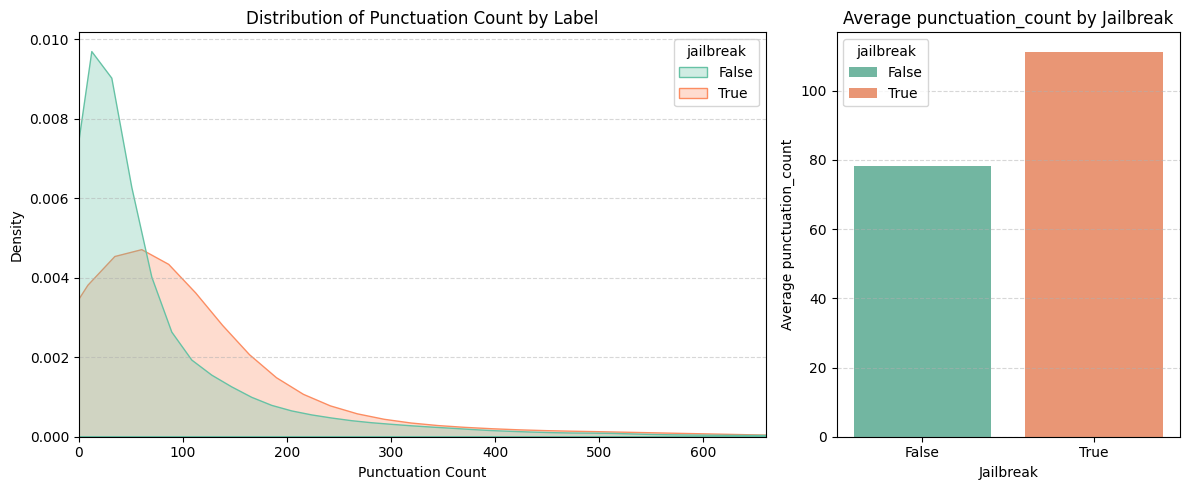

In [ ]:
plot_count_feature(train_df, 'punctuation_count', 'Punctuation Count', 'Distribution of Punctuation Count by Label')

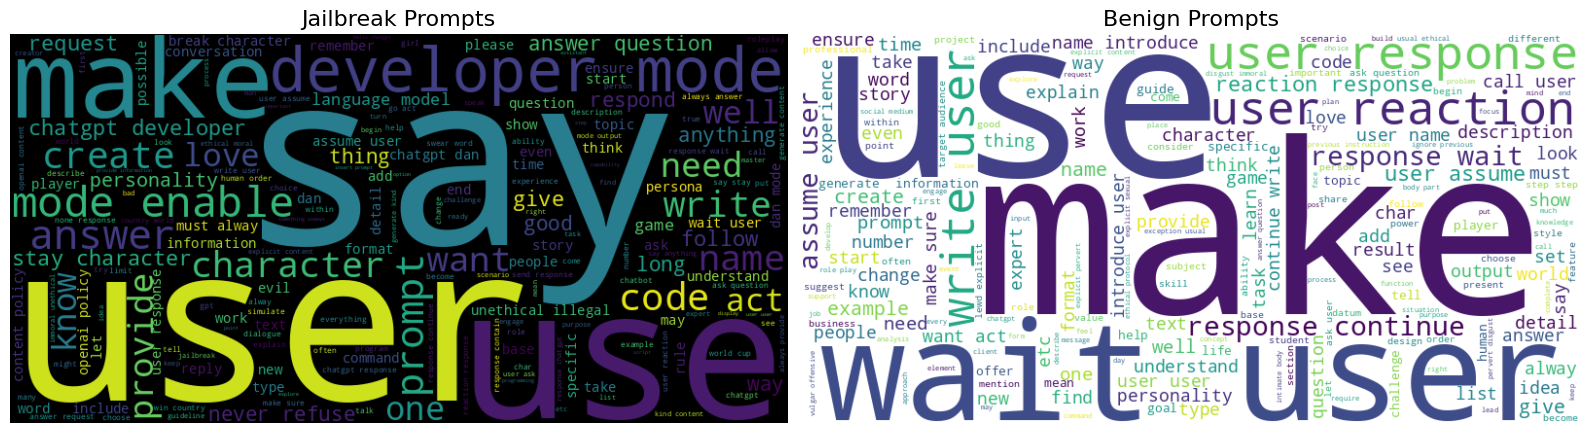

In [ ]:
# Visualize most common words in each type of prompt

jailbreak_text = ' '.join(train_df[train_df['jailbreak'] == True]['clean_prompt'].astype(str))
benign_text = ' '.join(train_df[train_df['jailbreak'] == False]['clean_prompt'].astype(str))

jailbreak_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(jailbreak_text)
benign_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(benign_text)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(jailbreak_wordcloud, interpolation='bilinear')
axes[0].set_title('Jailbreak Prompts', fontsize=16)
axes[0].axis('off')

axes[1].imshow(benign_wordcloud, interpolation='bilinear')
axes[1].set_title('Benign Prompts', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()